In [1]:
%matplotlib inline

In [28]:
from __future__ import print_function
import pylab as pl
import numpy as np
import rtpipe
import sdmpy
import rtlib_cython as rtlib
from scipy.io import wavfile
from IPython.display import Audio

In [ ]:
sdmfile = '16A-459_TEST_1hr.57623.72670021991.cut'
gainfile = '16A-459_TEST_1hr.57623.72670021991.GN'
segment=0

In [5]:
# move to directory with sdmfile and gainfile
%cd ..

/Users/caseyjlaw/data/repeater


## Summarize visibility cut-out file

In [55]:
sdm = sdmpy.SDM(sdmfile)

In [45]:
for scan in sdm.scans():
    print('Scan {} binary data file:'.format(scan.idx), end=" ")
    try:
        print(scan.bdf.fname)
        bdfscan = int(scan.idx)
    except IOError:
        print('None')
        
print('\nScan {} of {} holds data'.format(bdfscan, sdmfile))

Scan 1 binary data file: None
Scan 2 binary data file: None
Scan 3 binary data file: None
Scan 4 binary data file: None
Scan 5 binary data file: None
Scan 6 binary data file: /Users/caseyjlaw/data/repeater/16A-459_TEST_1hr.57623.72670021991.cut/ASDMBinary/uid____evla_bdf_1471974264507
Scan 7 binary data file: None
Scan 8 binary data file: None
Scan 9 binary data file: None
Scan 10 binary data file: None
Scan 11 binary data file: None
Scan 12 binary data file: None
Scan 13 binary data file: None
Scan 14 binary data file: None

Scan 6 of 16A-459_TEST_1hr.57623.72670021991.cut holds data


## Search for FRB

In [66]:
st = rtpipe.RT.set_pipeline(sdmfile, bdfscan, dmarr=[560.], dtarr=[1], flaglist=[('badap', 3., 0.2)], 
                                uvoversample=1.5, gainfile=gainfile, flagantsol=True, 
                                timesub='mean', npix_max=1024, logfile=False, savecands=False,
                               savenoise=False)

2016-10-24 14:45:26,303 - rtpipe.parsesdm - INFO - Setting (standard) key logfile to False
2016-10-24 14:45:26,304 - rtpipe.parsesdm - INFO - Setting (standard) key timesub to mean
2016-10-24 14:45:26,305 - rtpipe.parsesdm - INFO - Setting (standard) key gainfile to 16A-459_TEST_1hr.57623.72670021991.GN
2016-10-24 14:45:26,305 - rtpipe.parsesdm - INFO - Setting (standard) key dmarr to [560.0]
2016-10-24 14:45:26,306 - rtpipe.parsesdm - INFO - Setting (standard) key dtarr to [1]
2016-10-24 14:45:26,306 - rtpipe.parsesdm - INFO - Setting (standard) key npix_max to 1024
2016-10-24 14:45:26,307 - rtpipe.parsesdm - INFO - Setting (standard) key savecands to False
2016-10-24 14:45:26,307 - rtpipe.parsesdm - INFO - Setting (standard) key flaglist to [('badap', 3.0, 0.2)]
2016-10-24 14:45:26,308 - rtpipe.parsesdm - INFO - Setting (standard) key savenoise to False
2016-10-24 14:45:26,308 - rtpipe.parsesdm - INFO - Setting (standard) key flagantsol to True
2016-10-24 14:45:26,309 - rtpipe.parses

In [67]:
rtpipe.RT.pipeline(st, segment)

2016-10-24 14:45:27,010 - rtpipe - INFO - Starting search of /Users/caseyjlaw/data/repeater/16A-459_TEST_1hr.57623.72670021991.cut, scan 6, segments [0]
2016-10-24 14:45:28,342 - rtpipe.parsesdm - INFO - Reading scan 6, segment 0/0, times 17:51:21.920 to 17:51:25.920
2016-10-24 14:45:28,522 - rtpipe.parsesdm - INFO - Reading 800 ints starting at int 0
2016-10-24 14:45:33,571 - rtpipe.parsesdm - INFO - Found online flags for 144 antenna/time ranges.
2016-10-24 14:45:33,579 - rtpipe.parsesdm - INFO - Applied online flags to 0 ints.
2016-10-24 14:45:36,490 - rtpipe.parsesdm - WARNING - No BDF found for scans [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14]
2016-10-24 14:45:36,572 - rtpipe.parsesdm - INFO - Calculating uvw at 2016/08/23/17:51:23.920 for scan 6 of source FRB121102-off
2016-10-24 14:45:36,669 - rtpipe.parsecal - INFO - Read telcalfile 16A-459_TEST_1hr.57623.72670021991.GN
2016-10-24 14:45:36,680 - rtpipe.parsecal - INFO - Frequency selection cut down to 1296 solutions
2016-10-24

## Get calibrated data for FRB

In [85]:
data = rtpipe.RT.pipeline_reproduce(st, candloc=[segment,0,0,0,0], product='data')

2016-10-24 14:55:14,391 - rtpipe.parsesdm - INFO - Reading scan 6, segment 0/0, times 17:51:21.920 to 17:51:25.920
2016-10-24 14:55:14,581 - rtpipe.parsesdm - INFO - Reading 800 ints starting at int 0
2016-10-24 14:55:17,525 - rtpipe.parsesdm - INFO - Found online flags for 144 antenna/time ranges.
2016-10-24 14:55:17,531 - rtpipe.parsesdm - INFO - Applied online flags to 0 ints.
2016-10-24 14:55:21,874 - rtpipe.parsesdm - WARNING - No BDF found for scans [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14]
2016-10-24 14:55:21,955 - rtpipe.parsesdm - INFO - Calculating uvw at 2016/08/23/17:51:23.920 for scan 6 of source FRB121102-off
2016-10-24 14:55:22,057 - rtpipe.parsecal - INFO - Read telcalfile 16A-459_TEST_1hr.57623.72670021991.GN
2016-10-24 14:55:22,068 - rtpipe.parsecal - INFO - Frequency selection cut down to 1296 solutions
2016-10-24 14:55:22,072 - rtpipe.parsecal - INFO - Selection down to 432 solutions separated from given time by 4 minutes
2016-10-24 14:55:22,076 - rtpipe.parsecal

In [86]:
# phase up at (now known) location of FRB121102
(l1, m1) = (-3.85e-04,5.45e-04)
u, v, w = rtpipe.parsesdm.get_uvw_segment(st, segment)
rtlib.phaseshift_threaded(data, st, l1, m1, u, v)

2016-10-24 14:55:40,392 - rtpipe.parsesdm - WARNING - No BDF found for scans [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14]
2016-10-24 14:55:40,482 - rtpipe.parsesdm - INFO - Calculating uvw at 2016/08/23/17:51:23.920 for scan 6 of source FRB121102-off


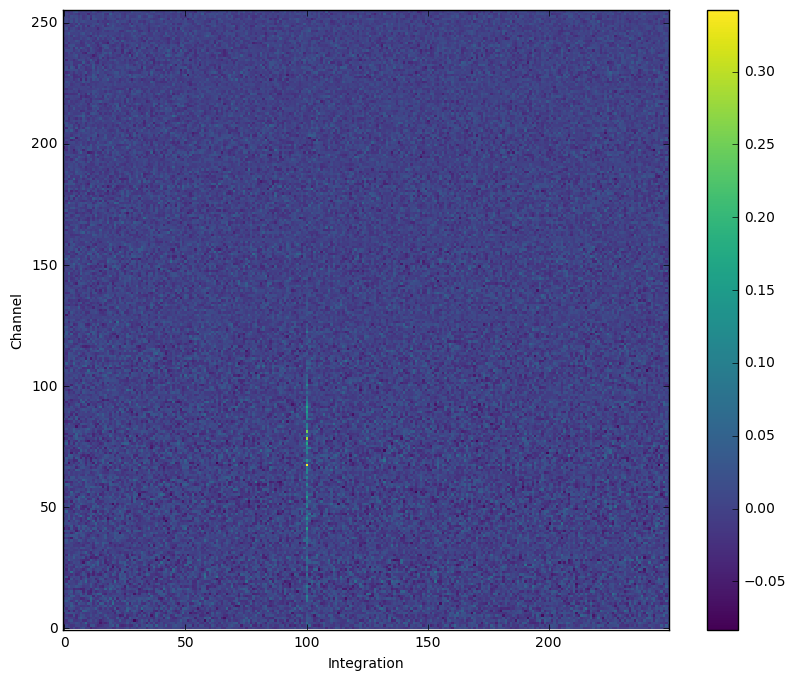

In [124]:
# get spectrogram (frequency-time) data
sgram = data[300:550].mean(axis=3).mean(axis=1).real.transpose()
pl.figure(figsize=(10,8))
pl.imshow(sgram, interpolation='nearest', origin='lower', cmap='viridis')
pl.xlabel('Integration')
pl.ylabel('Channel')
pl.colorbar()

## Make mp3

In [111]:
mp3name = sdmfile + '.mp3'
T = len(sgram[0])
n = len(sgram)*2
sgram_fft = np.fft.irfft(sgram, n=n, axis=0).real[:n/2]

# line up ffts in time
sound0 = sgram_fft.reshape(n/2*T, order='F')
sound1 = np.int16((sound-sound.min()) * 2**16/(sound0.max()-sound0.min()) - 32767)  
print('Rescaled sound min/max from {0:.2f}/{1:.2f} to {2}/{3}'.format(sound0.min(), sound0.max(), sound1.min(), sound1.max()))
    
fs = n/2*200
wavfile.write(mp3name, int(fs), sound)

Rescaled sound min/max from -0.01/0.03 to -32767/20525


In [112]:
# play your new ringtone
Audio(mp3name)

## Dedisperse and image

In [97]:
rtlib.dedisperse_par(data, st['freq'], st['inttime'], st['dmarr'][0], [0, st['nbl']])

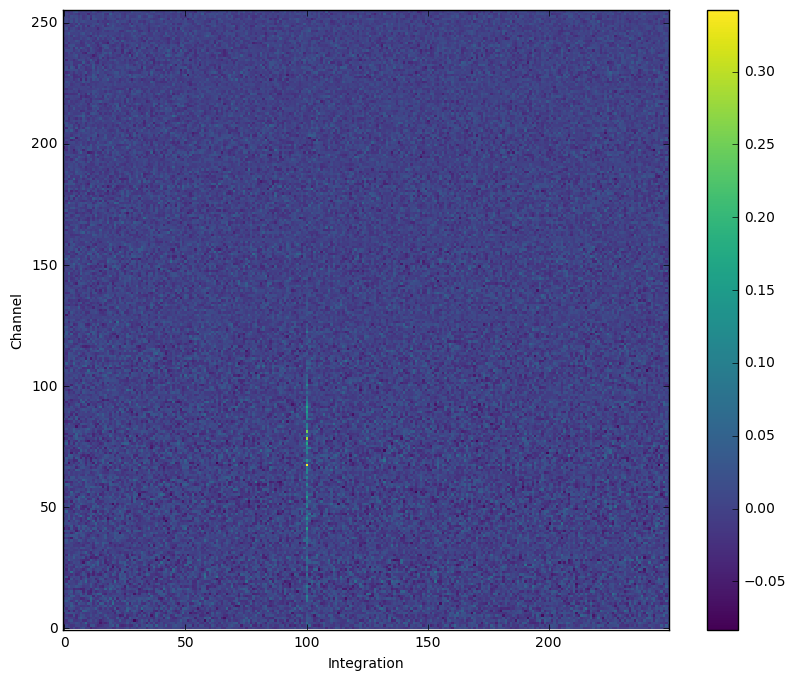

In [125]:
sgram = data[300:550].mean(axis=3).mean(axis=1).real.transpose()
pl.figure(figsize=(10,8))
pl.imshow(sgram, interpolation='nearest', origin='lower', cmap='viridis')
pl.xlabel('Integration')
pl.ylabel('Channel')
pl.colorbar()

## Check out spectrum

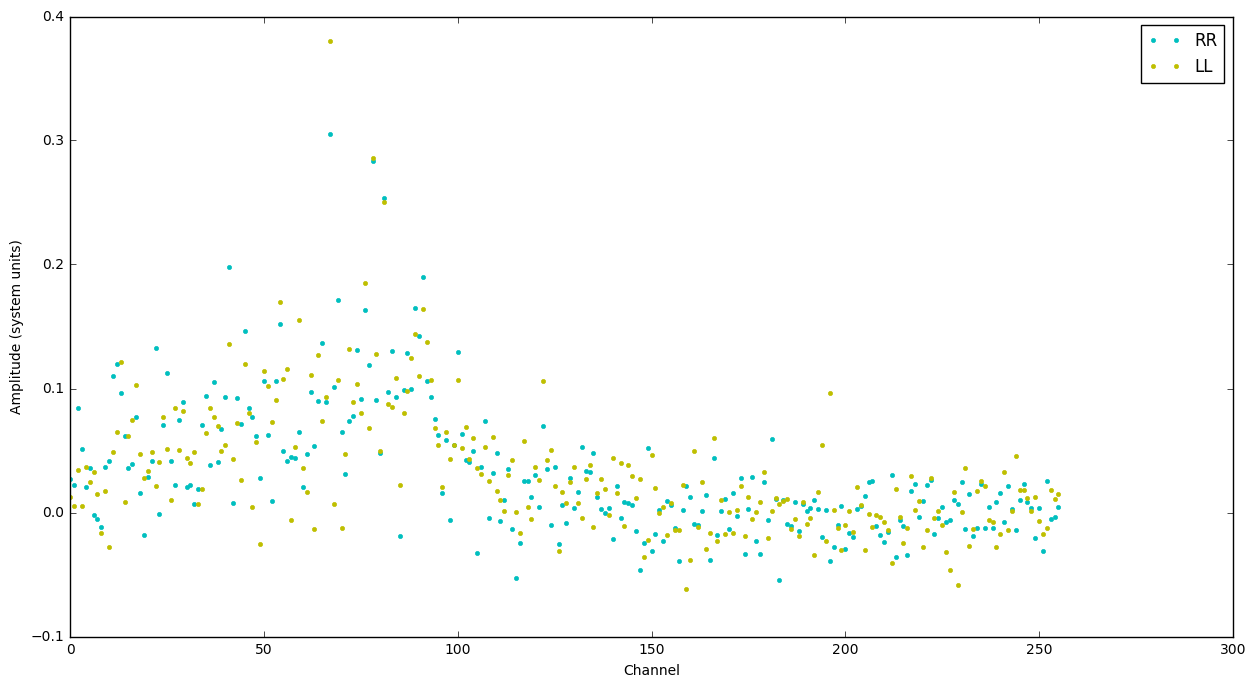

In [130]:
spectra = data[400].mean(axis=0).real
pl.figure(figsize=(15,8))
pl.plot(spectra[:,0], 'c.', label='RR')
pl.plot(spectra[:,1], 'y.', label='LL')
pl.xlabel('Channel')
pl.ylabel('Amplitude (system units)')
pl.legend()